# Naives Bayes

## 1. Import the libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## 2. Import the libraries

In [4]:
dataset = pd.read_csv('wine_updated.csv')
x = dataset[['Alcohol', 'Ash']].values
y = dataset['Class'].values

## 3. Splitting the dataset into training and test set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 4. Feature Scaling

In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 5. Training the Naive Bayes model on the training set

In [8]:
y_train = y_train.ravel()
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

## 6. Predicting on new data

In [11]:
new_data = [[13.8, 4.1], [12.6, 3.2],[14.1, 2.1]]
scaled_new_data = sc.transform(new_data)
new_predict = nb.predict(scaled_new_data)
print('Predictions classes: ', new_predict)

Predictions classes:  [2 2 1]


## 7. Visualizing the Training set results

In [13]:
from matplotlib.colors import ListedColormap

Text(0.5, 0, 'Alcohol')

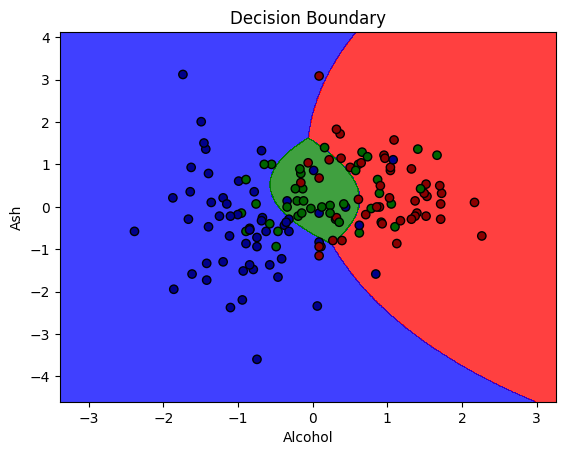

In [14]:
x1_range = np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)
x2_range = np.arange(start=x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)
x1, x2 = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = nb.predict(grid_points).reshape(x1.shape)
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolor='k')
plt.title('Decision Boundary')
plt.ylabel('Ash')
plt.xlabel('Alcohol')

## 8. Visualizing the Test set results

In [15]:
x1_range = np.arange(start=x_test[:,0].min()-1, stop=x_test[:,0].max()+1, step=0.01)
x2_range = np.arange(start=x_test[:,1].min()-1, stop=x_test[:,1].max()+1, step=0.01)
x1, x2 = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = nb.predict(grid_points).reshape(x1.shape)
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(x_test[:,0], x_test[:, 1], c=y_test, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolor='k')
plt.title('Decision Boundary')
plt.ylabel('Ash')
plt.xlabel('Alcohol')

Text(0.5, 0, 'Alcohol')

## 9. Getting the accuracies

In [16]:
y_pred = nb.predict(x_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[14  0  0]
 [ 0 14  0]
 [ 3  0  5]]


In [19]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 91.67%
